In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




Dataset

In [2]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


Deskripsi Dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


model = model mobil
year = tahun mobil
price = harga mobil
transmission = transmisi
mileage = jumlah kilometer
fuelType = jenis bahan bakar
tax = bahan bakar
mpg = konsumsi bahan bakar
enginesize = ukuran mesin mobil

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


PREPROCESING

In [5]:
df['price'].describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
#duplikat
df.duplicated().sum()

np.int64(39)

In [8]:
# penskalaan
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

features_to_scale = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])

x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])

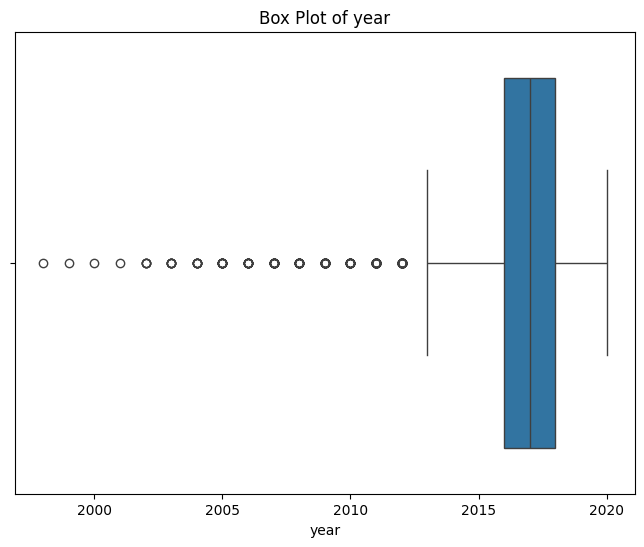

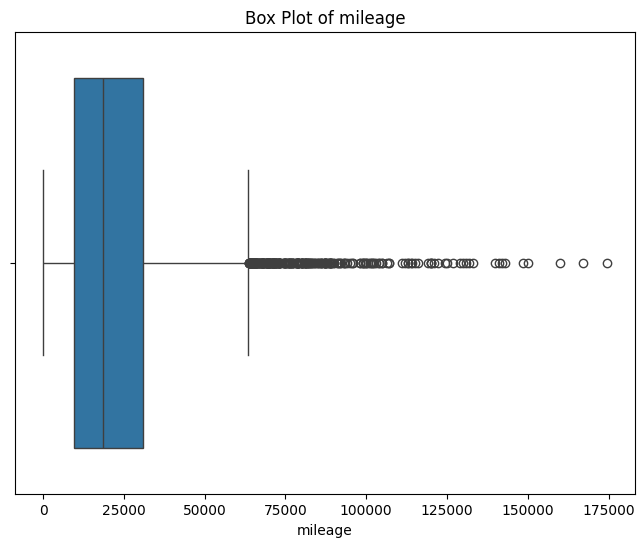

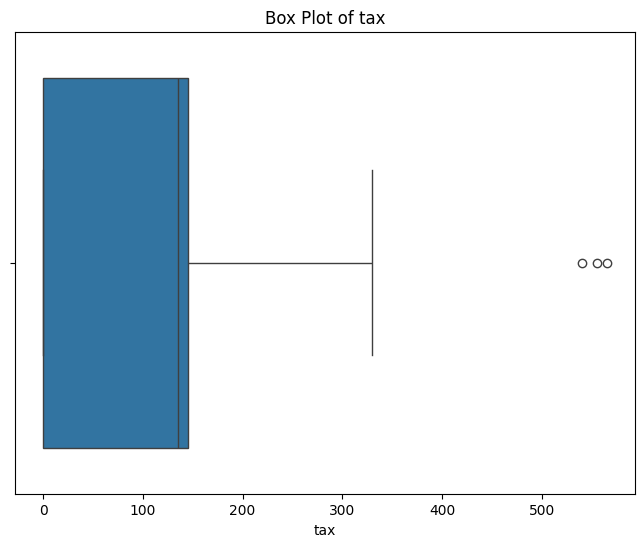

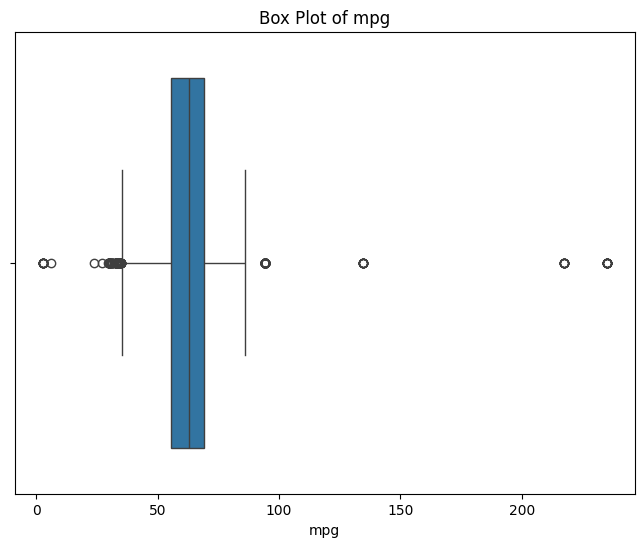

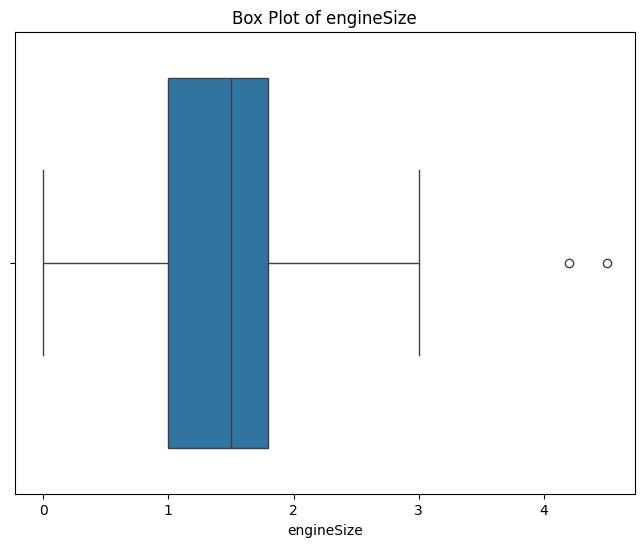

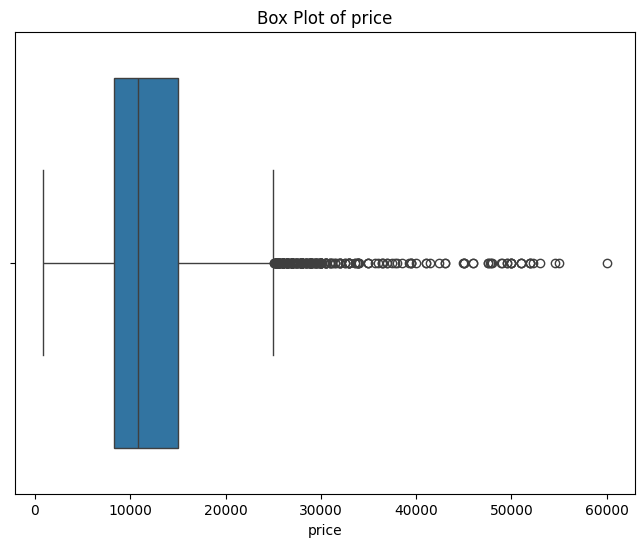

In [9]:
# Outlier
for feature in ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [10]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


VISUAL DATA(EDA)

<Axes: >

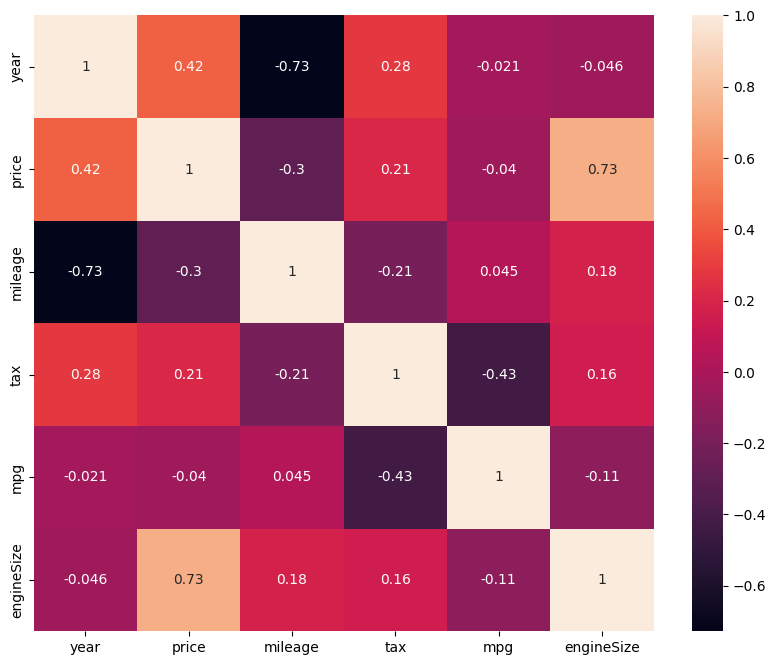

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

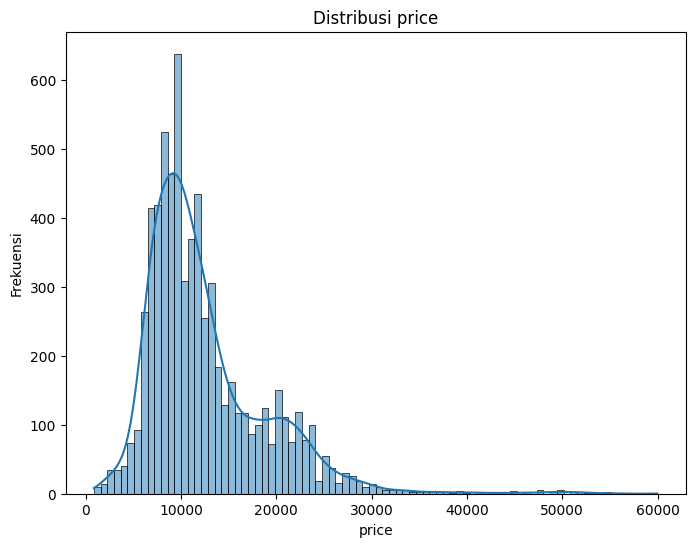

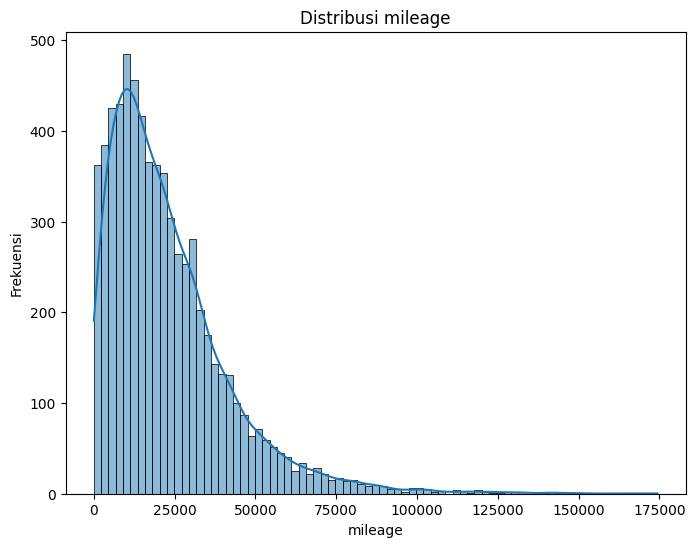

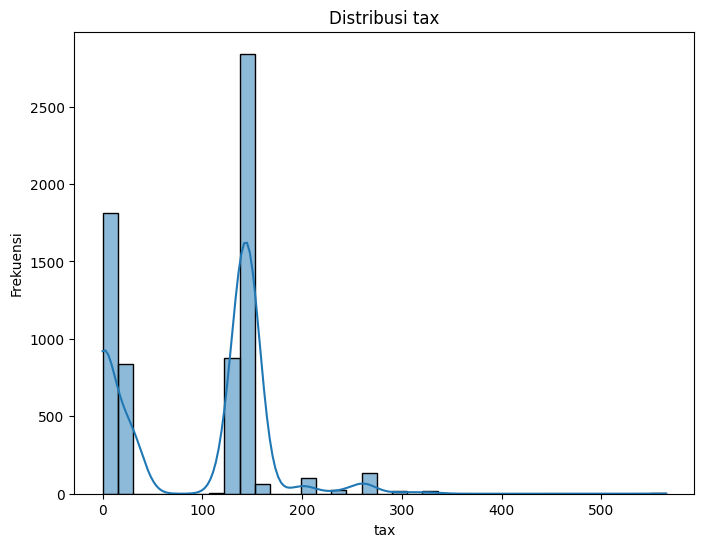

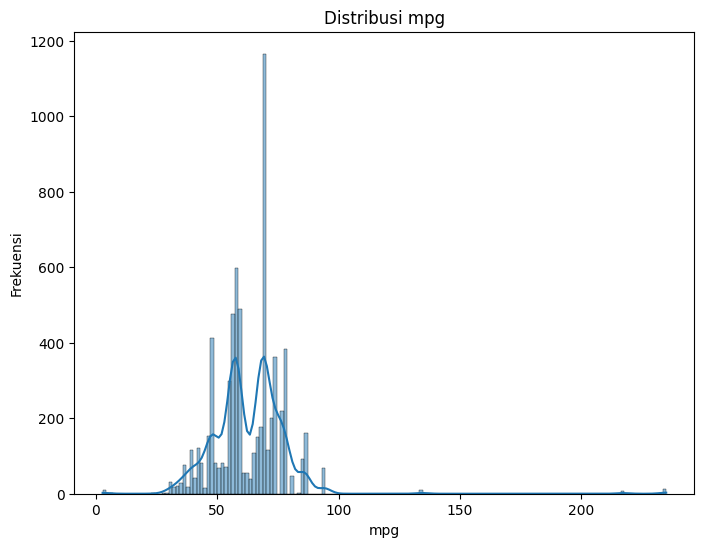

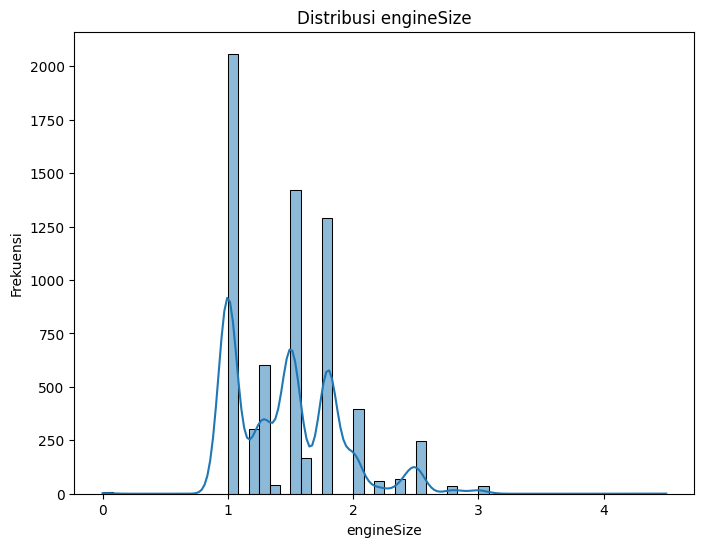

In [12]:
# Analisi Distribusi histogram
variables = ['price', 'mileage', 'tax', 'mpg', 'engineSize']

for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribusi {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frekuensi')
    plt.show()

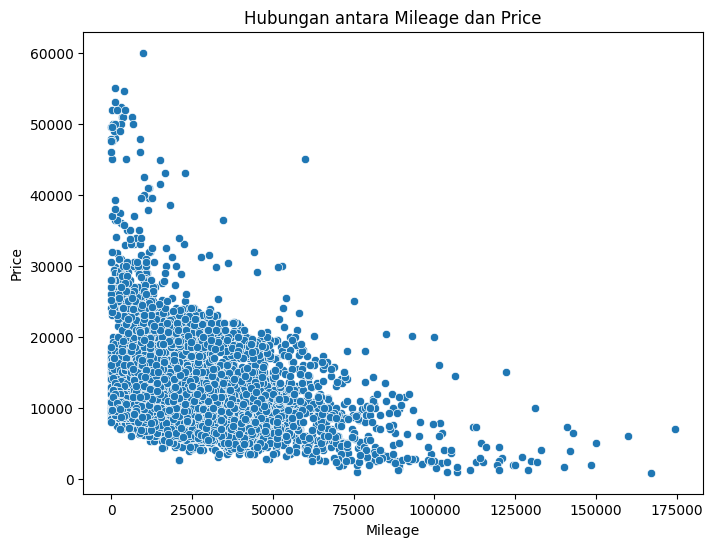

In [13]:
# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['mileage'], y=df['price'])
plt.title('Hubungan antara Mileage dan Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

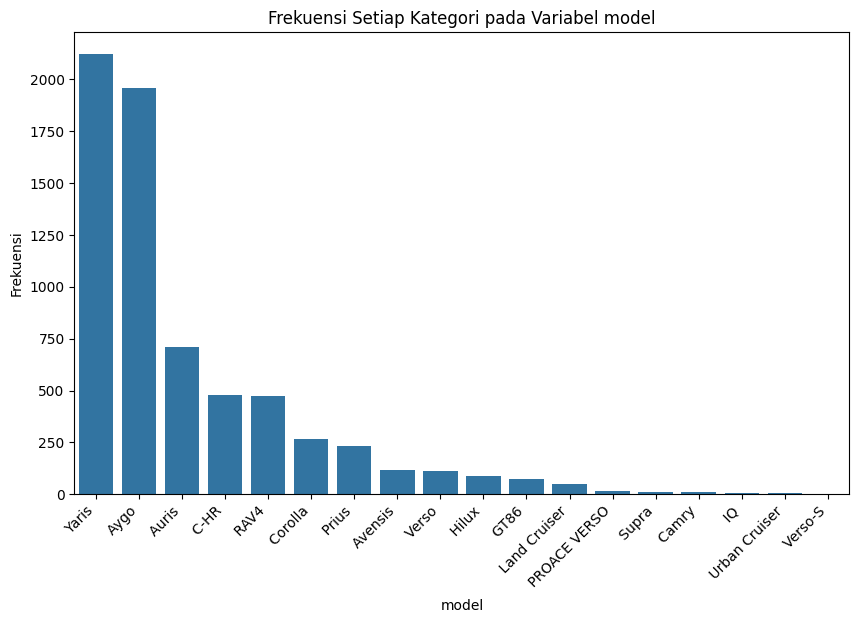

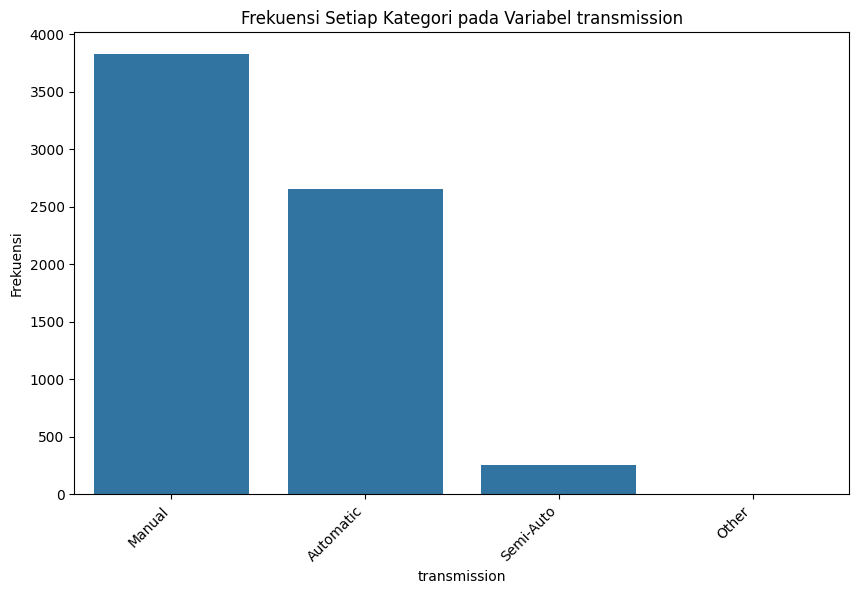

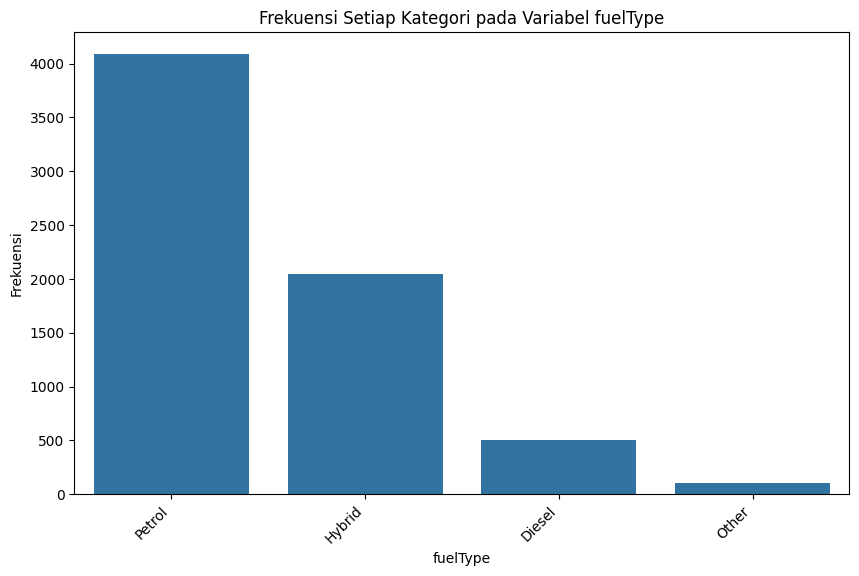

In [14]:
# variabel kategorikal
categorical_vars = ['model', 'transmission', 'fuelType']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[var], order=df[var].value_counts().index)
    plt.title(f'Frekuensi Setiap Kategori pada Variabel {var}')
    plt.xlabel(var)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [15]:
# menggroupby data berdasarkan 'model' dan menghitung rata-rata 'price'
model_price_means = df.groupby('model')['price'].mean()

print(model_price_means)

model
Auris            12507.911517
Avensis           9884.356522
Aygo              7905.414584
C-HR             20651.540710
Camry            26910.090909
Corolla          20942.734082
GT86             19908.849315
Hilux            21504.593023
IQ                4247.250000
Land Cruiser     36487.156863
PROACE VERSO     28680.200000
Prius            18998.844828
RAV4             18161.059197
Supra            50741.000000
Urban Cruiser     4617.500000
Verso            12169.157895
Verso-S           5746.666667
Yaris            10553.083883
Name: price, dtype: float64


feature extraction dan feature selection

In [16]:
df['tax_mpg_ratio'] = df['tax'] / df['mpg']


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Pisahkan fitur
tax_mpg_ratio_values = df[['tax_mpg_ratio']]

# Buat objek scaler
scaler_tax_mpg = MinMaxScaler()

# Fit dan transform
scaled_tax_mpg_ratio = scaler_tax_mpg.fit_transform(tax_mpg_ratio_values)

# Gabungkan kembali
df['tax_mpg_ratio_scaled'] = scaled_tax_mpg_ratio

# Hapus kolom tax_mpg_ratio yang belum diskalakan (opsional)
# df = df.drop('tax_mpg_ratio', axis=1)

In [18]:
# Rasio tax terhadap mpg
df['tax_mpg_ratio'] = df['tax'] / df['mpg']

# Pengelompokan model berdasarkan segmen (contoh sederhana)
# Assuming 'model' was one-hot encoded, we need to find the corresponding columns
model_columns = [col for col in df.columns if col.startswith('model_')]

def group_model_segment(row):
    if any(row[col] == 1 for col in [c for c in model_columns if 'Auris' in c or 'Yaris' in c or 'Aygo' in c or 'Corolla' in c]):
        return 'Compact'
    elif any(row[col] == 1 for col in [c for c in model_columns if 'RAV4' in c or 'C-HR' in c or 'Prius' in c]):
        return 'SUV/Hybrid'
    else:
        return 'Other'

df['model_segment'] = df.apply(group_model_segment, axis=1)
df = pd.get_dummies(df, columns=['model_segment'], drop_first=True)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Inisialisasi model dan RFE
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=1) # Pilih 1 fitur terbaik

# Fit RFE ke data training
x_train_rfe = rfe.fit_transform(x_train, y_train)
x_test_rfe = rfe.transform(x_test)

# Dapatkan fitur-fitur yang terpilih
selected_features_rfe = x_train.columns[rfe.support_]
print("Fitur yang terpilih oleh RFE:", selected_features_rfe)

Fitur yang terpilih oleh RFE: Index(['engineSize'], dtype='object')


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Removed extra indentation
rf_model.fit(x_train, y_train)

importances = rf_model.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

      Feature  Importance
4  engineSize    0.586106
0        year    0.269457
3         mpg    0.075649
1     mileage    0.051565
2         tax    0.017223


In [21]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
x = df[selected_features]
y = df['price']

seleksi fitur

In [22]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

split data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

model

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print('Akurasi model Random Forest (R-squared) =', score)

Akurasi model Random Forest (R-squared) = 0.9560871760632513


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming x_train and x_test are already defined from previous cells
x_train_rf = x_train  # Use your existing x_train
x_test_rf = x_test   # Use your existing x_test

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_rf, y_train)

# Prediksi pada data testing
y_pred = model.predict(x_test_rf)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.9561
Mean Squared Error (MSE): 1669049.28
Root Mean Squared Error (RMSE): 1291.92


In [30]:
#ketereangan Year=2019, mileag=5000, tax=145, mpg=30.2, enginesize=2

input_data = np.array([[2019,5000,145,30.2,2]])
prediction = rf.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [25443.85]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


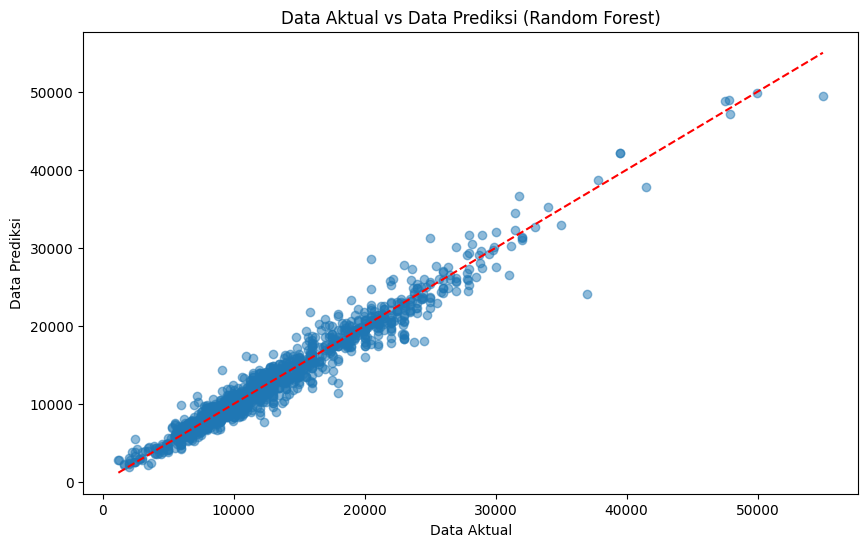

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already trained your Random Forest model (rf)
# and have your x_test and y_test data

# Prediksi pada data testing
y_pred = rf.predict(x_test)

# Membuat scatter plot untuk data aktual vs prediksi
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.title("Data Aktual vs Data Prediksi (Random Forest)")

# Menambahkan garis diagonal (ideal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

save nodel

In [29]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(rf, open(filename, 'wb'))